# Gabriel Duarte 

# Eng 2a Ciencia dos dados

# Introdução:
    
        Esse trabalho tem como objetivo comparar duas base de dados com o IDH (Índice de Desenvolvimento Humano) de diversos paises, e por meio do dicionário "pandas" para python separar, organizar e analisar os dados obtidos. Foi escolhido então porcentagem de estradas pavimentas e quantidade de energia gerada pensando que seria uma infraestrutura que estaria relacionada a um local com tecnologias para facilidade para as pessoas e empresas afetando então o IDH.

# Pergunta:
    Um local com um alto IDH tem relação com um pais ter uma melhor infraestrutura no transporte e na geração de energia?

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

dh = pd.read_excel('Indicator_HDI.xlsx')
de = pd.read_excel('Electricity Generation.xlsx')
dr = pd.read_excel('roads paved.xlsx')

In [91]:
# Loc
idh_2005 = dh.loc[:,["HDI",2005]]
energia_2005 = de.loc[:,["Electricity generation total (kilowatt-hours)",2005]]
estrada_2005 = dr.loc[:,["Roads, paved (% of total roads)","2005"]]

In [92]:
# set_index
a_idh = idh_2005.set_index("HDI")
a_energia = energia_2005.set_index("Electricity generation total (kilowatt-hours)")
a_estrada = estrada_2005.set_index("Roads, paved (% of total roads)")

In [93]:
# join
j_EA = a_energia.join(a_estrada, how="inner",lsuffix=" energia",rsuffix=' estrada' )
J_T = a_idh.join(j_EA, how='inner',lsuffix=' HDI',rsuffix=' Energia Gerada')
J_T.columns=["2005 HDI","2005 Energia Gerada","2005 Estradas pavimentadas [%]"]
J_T.to_csv("Projeto_dados.csv")

In [94]:
J_T.to_csv("Projeto_dados.csv")
data = J_T.dropna()
data.head()

,2005 HDI,2005 Energia Gerada,2005 Estradas pavimentadas [%]
Austria,0.860,60632000000,100.000000
Belarus,0.723,30961000000,88.639999
Bulgaria,0.749,44365000000,98.400002
Chile,0.779,54483000000,21.038000
China,0.633,2500260000000,40.799999


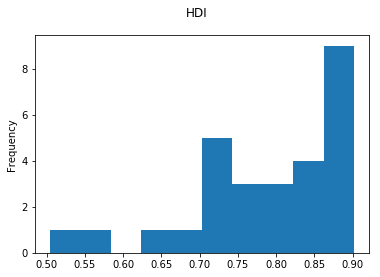

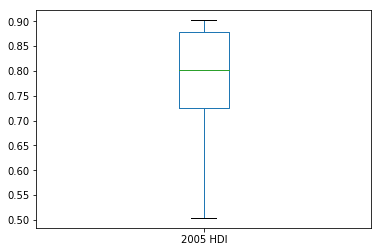

count    28.000000
mean      0.787786
std       0.105030
min       0.504000
25%       0.724500
50%       0.801500
75%       0.877500
max       0.902000
Name: 2005 HDI, dtype: float64

In [95]:
data["2005 HDI"].plot.hist()
plt.suptitle("HDI")
plt.show()
data["2005 HDI"].plot.box()
plt.show()
data["2005 HDI"].describe()

Analisando os primeiros graficos sobre o IDH, percebemos que eles não estão simetricos, por causa principalmente de muitos paises menores não terem as bases de dados das outras variaveis e para comparalos foi cortado os paises que não tinham as três variaveis.

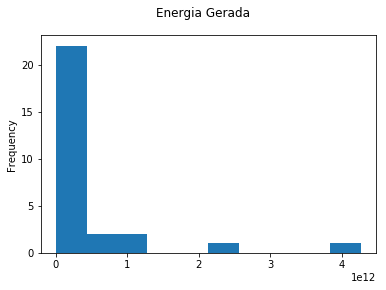

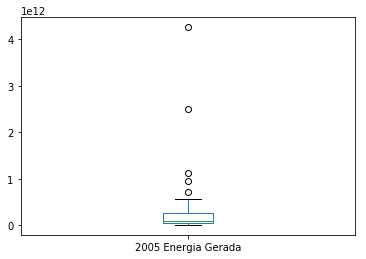

count    2.800000e+01
mean     4.404265e+11
std      9.103414e+11
min      8.680000e+09
25%      4.183583e+10
50%      9.880800e+10
75%      2.743982e+11
max      4.257369e+12
Name: 2005 Energia Gerada, dtype: float64

In [96]:
data["2005 Energia Gerada"].plot.hist()
plt.suptitle("Energia Gerada")
plt.show()
data["2005 Energia Gerada"].plot.box()
plt.show()
data["2005 Energia Gerada"].describe()

Nos gráficos de energia gerada temos a maioria dos paises numa mesma faixa, e alguns pontos fora do padrão, talvez por varios desses paises listados serem de uma mesma região, principalmete da Europa, e usarem os mesmos métodos para coleta da energia. 

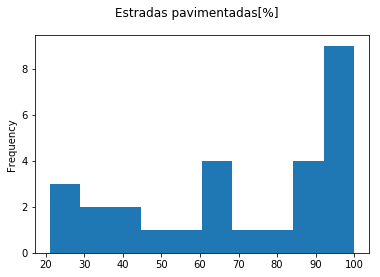

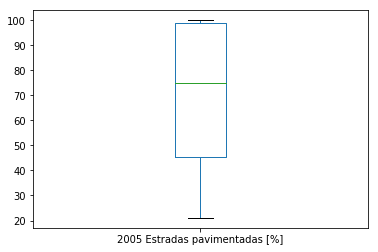

count     28.000000
mean      70.597682
std       27.998031
min       21.038000
25%       45.442500
50%       75.012158
75%       98.800001
max      100.000000
Name: 2005 Estradas pavimentadas [%], dtype: float64

In [97]:
data["2005 Estradas pavimentadas [%]"].plot.hist()
plt.suptitle("Estradas pavimentadas[%]")
plt.show()
data["2005 Estradas pavimentadas [%]"].plot.box()
plt.show()
data["2005 Estradas pavimentadas [%]"].describe()

Observando os gráficos da porcentagem de pavimentação, podemos reparar que esta bem distribuido, acho que seria mais ligado ao terreno e o tamanho do pais, alterando fortemente a dificuldade de pavimentação completa.

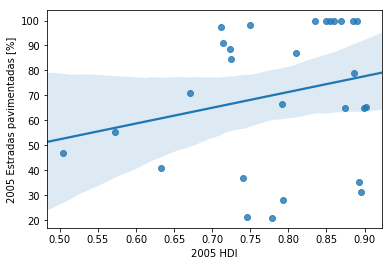

In [99]:
sns.regplot(data["2005 HDI"],data["2005 Estradas pavimentadas [%]"]);

correlação = 0.236798


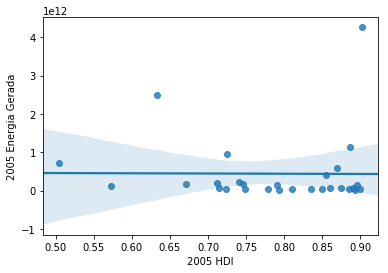

In [100]:
sns.regplot(data["2005 HDI"],data["2005 Energia Gerada"]);

correlação = -0.006634


In [101]:
data.corr()

,2005 HDI,2005 Energia Gerada,2005 Estradas pavimentadas [%]
2005 HDI,1.000000,-0.006634,0.236798
2005 Energia Gerada,-0.006634,1.000000,-0.110663
2005 Estradas pavimentadas [%],0.236798,-0.110663,1.000000


# Conclusão:
    Em um contexto geral podemos concluir que o IDH não tem uma relação com as outras duas variaves. Muito provavelmente não teve um resultado próximo do real por ter poucos paises,e a maioria deles terem um IDH alto para se formular uma regra  geral e por incluir apenas um pais do hemisfério sul, o Chile.
    
    As variaveis escolhidas parecem ser afetadas por outros diversos fatores, deixando a correlação com o IDH, se existir,   bem baixa em comparação a outros.  
    
    
    